In [67]:
#Define dependencies

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt

In [68]:
#Define path to csv file and read property sales csv

filepath=os.path.join('Resources','property_sales.csv')
property_sales=pd.read_csv(filepath)
property_sales.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,SuffixDire,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,N,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,N,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,S,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001


In [69]:
#Find all indices of null values in gross sales Column
null_indices=property_sales[property_sales['Gross_Sale'].isna()].index

In [70]:
#Drop all rows with null values in Gross sales column
property_sales.drop(index=null_indices, inplace=True)

In [71]:
#Plot a histogram to observe the distribution 
px.histogram(property_sales['Gross_Sale'], histnorm='probability')

## Adjustment of x-axis 
Since histogram shows that our data is right-skewed, we make adjustments to range of  x-axis to make histogram more visible.

In [72]:
# Make adjustments to range of  x-axis to make histogram more visible

px.histogram(property_sales['Gross_Sale'], histnorm='probability',nbins=10000, range_x=[0,3000000])

In [73]:
# Create two random samples from the property sales dataset

sample1=property_sales.sample(n=1000)
sample2=property_sales.sample(n=1000)

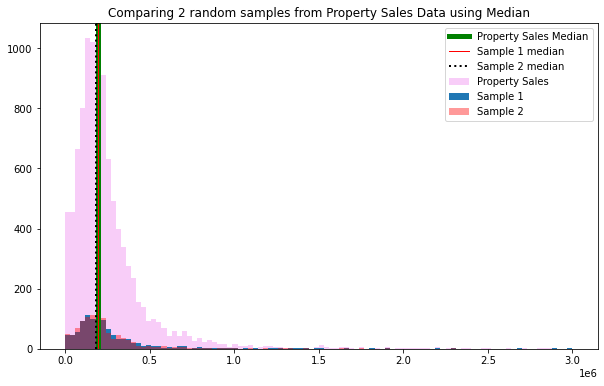

In [82]:
# Plot histograms of both samples and indicate their median values

plt.figure(figsize=[10,6])

plt.hist(property_sales['Gross_Sale'], bins=100, range=(0,3000000), alpha=0.4, color='violet')
plt.hist(sample1['Gross_Sale'], bins=100,range=(0,3000000))
plt.hist(sample2['Gross_Sale'], bins=100, range=(0,3000000), alpha=0.4, color='red')

plt.axvline(property_sales['Gross_Sale'].median(),color='green', linewidth=5)
plt.axvline(sample1['Gross_Sale'].median(), linewidth=1, color='red')
plt.axvline(sample2['Gross_Sale'].median(),color='black', linewidth=2, linestyle='dotted')
plt.legend(['Property Sales Median', 'Sample 1 median', 'Sample 2 median','Property Sales','Sample 1', 'Sample 2'])
plt.title("Comparing 2 random samples from Property Sales Data using Median")
plt.show()

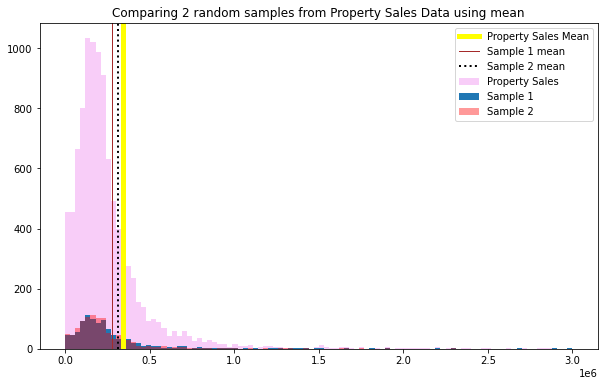

In [86]:
plt.figure(figsize=[10,6])


plt.hist(property_sales['Gross_Sale'], bins=100, range=(0,3000000), alpha=0.4, color='violet')
plt.hist(sample1['Gross_Sale'], bins=100,range=(0,3000000))
plt.hist(sample2['Gross_Sale'], bins=100, range=(0,3000000), alpha=0.4, color='red')

plt.axvline(property_sales['Gross_Sale'].mean(),color='yellow', linewidth=5)
plt.axvline(sample1['Gross_Sale'].mean(), linewidth=1, color='brown')
plt.axvline(sample2['Gross_Sale'].mean(),color='black', linewidth=2, linestyle='dotted')
plt.legend(['Property Sales Mean', 'Sample 1 mean', 'Sample 2 mean','Property Sales','Sample 1', 'Sample 2'])
plt.title("Comparing 2 random samples from Property Sales Data using mean")
plt.show()

## Conclusion

1. Comparing the median values of the two random data sampled from the property data, the median values shown from the graph show that they have similar distribution and are similar to the main population data as well. 
2. Due to the similarity between the distribution and median values, this provides a substantive indication that both samples were obtained from the same population.
3. Median is a better measure of central tendency than mean